In [6]:
# default_exp image_classification

# Week 1: Image Classification

> Training a resnet to predict if an image belongs to one of $n$ clases

In [4]:
#hide
from nbdev.showdoc import *

In [1]:
#export
from fastai.vision.all import *

Today, we're going to be "solving" a task called image classification using a model called ResNet. By the end of this workshop, you should be able to create and train your own neural networks to solve a wide variety of problems that can be forumlated as image classification. 

But before we get into neural networks, optimizers, backprop and all that other fancy jargon, it's important to realize that what you should _really_ understand when working with deep learning in the real world is _your_ data.

Specifically, I like to think about what the inputs and outputs are. This helps me come up with concrete things to implement in code.

In our case, today, we're going to be working on a problem called images classification. So let's consider, at a high level, what the inputs and outputs are.

## The Data

Well, we know that we want to use images as the input, and do something to them. So let's focus on that bit and get a little more specific. Here are some questions you should be asking:

1. What images are we going to use?
2. Where are they going to come from?
3. How are we going to load/store them?
4. Finally, what are we actually going to do with them?

Let's answer those questions in turn, with specific code snippets as much as possible.

### What Images to Use?

This really isn't complicated at all: use whatever you want!

This notebook (and deep learning in general) makes no assumption about what your images are and what they mean to you. In the end, a computer sees an image as bunch of ones and zeros. As long as your images are in some readable format and are not corrupt, pretty much anything goes.

Now, one caveat is that we may not be able to make a **good** classifier if you pick images thaat are really hard to classify. But that's an issue that you, the person who's trying to solve the problem, should be thinking about.

### Where Am I Supposed to Get Image From? 

Again, not too hard. Barring certain legal restrictions, you can get your images from anywhere!

For this particular notebook, we're going to use a dataset called Imagenette (yes, that's how it's spelled, and yes, you're supposed to say that with a French accent). Here's why:

1. It's small. So it's fast to download and use.
2. It's based on a **very** popular dataset called ImageNet, which is used a lot in research.
3. There are plently of results already available, so we a lot to compare to for benchmarking ourselves.

**But...** Imagenette can only take you so far. It's easy to run demo notebooks on toy datasets. What actually matters at the end of the day is if you're able to train an model on _your_ data that actually works and solves your problem.

So, instead of running the Imagenette example like I am, what you should be doing is running this code to train a model on your own dataset.

You don't have be curing cancer here. The dataset could be something as simple as collection of family photos, or your favorite comic book characters. In fact, we'll also be showing you how to use a script to exract your own datset from search engine resuts.

Luckily, fastai provides some nice functionality to download, extract, and load images for us, which we will be using here.

In [ ]:
path = untar_data(URLs.IMAGENETTE)

In [ ]:
path.ls()

(#2) [Path('/home/iyaja/.fastai/data/imagenette2/val'),Path('/home/iyaja/.fastai/data/imagenette2/train')]

The Imagenette dataset uses one of the most common deep learning image dataset format. It's generally refered to as the imagenet style, and it looks something like this:

![image.png](docs/images/imagenet_dirs.png)

One thing you'll notice is that dataset, at a high level, has been split into `train` and `valid` folders. It's important that we don't mix theme up.

The training set (labelled as `train`) stores the images that we'll be using to train the model, and the validation set (labelled as `valid`) is completely independant from that.

### Getting the Data in A Useable Format

Using the fastai datablocks api, we can easily assemble the dataset into a perfect format.

In [2]:
#export
data = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 get_y = parent_label,
                 splitter = GrandparentSplitter(valid_name='val'),
                 item_tfms = RandomResizedCrop(128, min_scale=0.35), 
                 batch_tfms = Normalize.from_stats(*imagenet_stats)
                )

What we just created and stored in the variable `data` is a DataBlock object. In fastai, a `DataBlock` is one of the most useful tools to manage loading and handling datasets. It automates tasks like getting and loading files, splitting the dataset into training and validation sets, assigning labels to input datapoints, and applying data augmentations or tramsformations.

But putting that aside for a second, I'd like to draw your attention to the first parameter of the `DataBlock` contructor. It looks like this:

```
blocks = (ImageBlock, CategoryBlock)
```

Again, this really comes back to the idea of really understanding what your inputs and outputs are. Here, we define the "blocks" that are important in this dataset. The term "blocks" is intentionally general. It makes no assumptions about what your block is. Theoretically, it could an image, a category, a number, , text, audio, video, or anything else you want.

A "block" makes no assumptions about whether it is an input or output. In general, you can have any of the things I listed above be either an input or an output. By default, when we specify two blocks like we did just now, fastai assumes that the first block is the input, and the second is the output.

But what's important, and this really comes to the core deep learning, is that in some sense, it doesn't really matter what your blocks are. Neural nets have been called "universal function approximators" for a reason - in theory, they can learn the mapping between datapoints of _any_ type.

So as long as you have a dataset to train on and model to do so, you can set up your datablock to solve arbitrary problems, like audio -> audio, image -> text, text -> category, or anything else you set your mind to.

The Datablock provides access to a lot of high-level functionality for us. But additionally, we have a `DataLoaders` class that provides access 

In [ ]:
dls = data.dataloaders(path)

Do not confuse `DataLoaders` with `DataLoader` (the difference being an additional "s" to indicate plurality). `DataLoaders` is still a fastai class, while `DataLoader` is the PyTorch class we discussed earlier.

Among it's many useful features is the `show_batch` function that does exactly as it's name suggests.

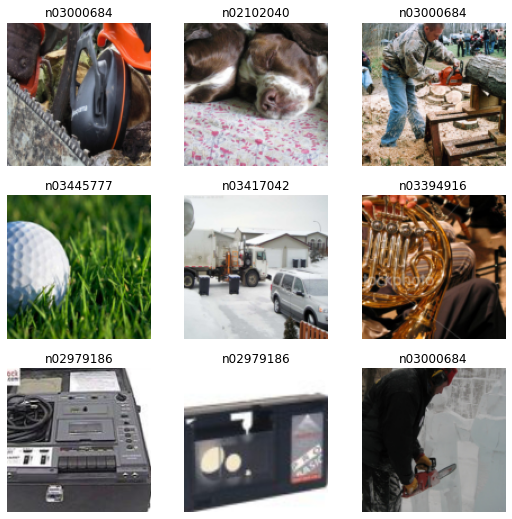

In [ ]:
dls.show_batch()

Now that we have a way to directly access all the data we need (images and their labels) in the right format (PyTorch tensors, which are used internally by fastai), we have concluded the data preperation phase.

While fastai certainly makes it simpler, most of the time, it will not be this easy. Many professional data scientists claim that perparing the dataset is most time consuming task of them all. This is because we usually don't have a clean dataset like Imagenette to work with in the real world, and ethically collecting data that accurately represents the distribution of the real world is not an easy task.

## The Model

Here's how to train a ResNet18 on the dataset we just prepared:

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.513884,0.247338,0.926624,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.246854,0.187095,0.944459,00:11
1,0.214951,0.167641,0.947516,00:11
2,0.148322,0.140674,0.954904,00:11
3,0.100381,0.134767,0.956688,00:11
4,0.087135,0.131774,0.957707,00:11


While a lot of detail was abstracted away in those two lines of code. For a lot of practical purposes, that's about it.

The reason we can do that, is because, as I mentioned, deep learning is very general. We make no assumptions about your data. So regardless of what images we use, those two lines of code that we just ran will remain the same.

But what exactly is going on here? It's nice to run some code and see numbers pop up on a screen, but that's not enough to comfotably use this network to make predictions in the real world.

Firstly, som high-level code details: we just build a fastai `Learner`. This is the other important class you'll be using a lot (the first being the `DataBlock` + `DataLoaders` combo). A learner is a wrapper around a PyTorch model and an optimizer.

We'll go through these in detail in the future, but here's the quick version: a model is represented as an `nn.Module` class in PyTorch. This is what is typically referred to as a "Neural Net" pretty much everywhere on the internet. The model conatins a set of parameters. Tweaking these parameters (which are just numbers) makes the model do different things.

Again, to be entirely clear, let's consider what the inputs and outputs are.

The input to our model is the image represented as an array. So this is not a traditional image file but rather, the result of performing some preprocessing and transforms. 

The output is a class prediction, which is another array that gives the probability of the image belonging to each class.